<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Clase9M%C3%A9todo_de_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Método de Euler**
Para resolver la ecuación diferencial
$$
x'(t)=f(t,x(t)),\qquad x(t_{0})=x_{0}
$$
usamos el método de Euler:
$$
x_{n+1}=x_{n}+hf(t_{n},x_{n}),
$$
donde $h$ es el paso y $t_n = t_0 + nh$.

**Ejemplo:** Resolver numéricamente la siguiente ecuacion $t \in [0, 5]$ con 100 pasos y comparar con la solución exacta en un gráfico.


1.   $x'(t)=x(t), \quad x(0)=1$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def euler(f,t0,T,x0,n):
  t = np.linspace(t0, T, n+1) #Esto tiene todos los tiempos separados por el paso h, recordar h = (T-t0)/n
  #Se agrega uno para poder incluir el T final en la grilla, si no se entiende pensar que pasa con n=1.
  x = np.zeros(n+1) #Una lista de 0s que vamos a ir rellenando con las solucion
  x[0]=x0 #El primer valor es la condicion inicial
  h = (T-t0)/n #paso
  for i in range(0, n): #x[0] ya lo rellenamos, asique empezamos por el 1, y vamos hasta n
    x[i+1] = x[i] + h * f(t[i], x[i])
  return(t,x) #Esta funcion ya nos devuelve la grilla para el grafico (t) y el valor en cada punto (x).

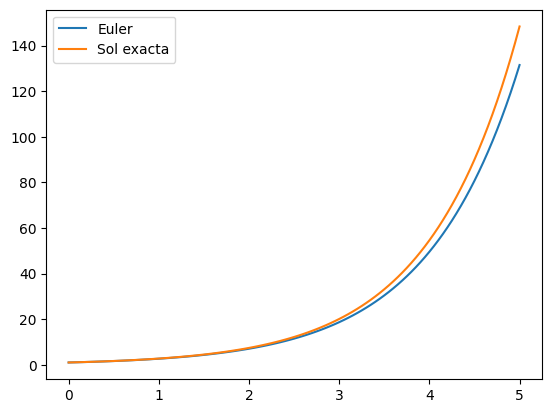

In [ ]:
def f1(t,x):
  y=x
  return y

x0=1
(t,x) = euler(f1,0,5,x0,100) #La grilla para el eje x es t y la obtengo desde la funcion del metodo de euler!
plt.plot(t,x,label="Euler")
plt.plot(t,np.exp(t),label="Sol exacta") #solucion exacta para f1
plt.legend()
plt.show()

**Ejercicio 1:** Resolver numéricamente las siguientes ecuaciones.



1.   $x'(t)=\cos(t), \quad x(0)=0$, $t \in [0, 3]$, con 1000 pasos.
2.   $\frac{{\left.{d}{x}\right.}}{{\left.{d}{t}\right.}}=\frac{t+2}{t+1}x, \quad x(0)=1$, $t \in [1, 3]$, con 100 pasos.

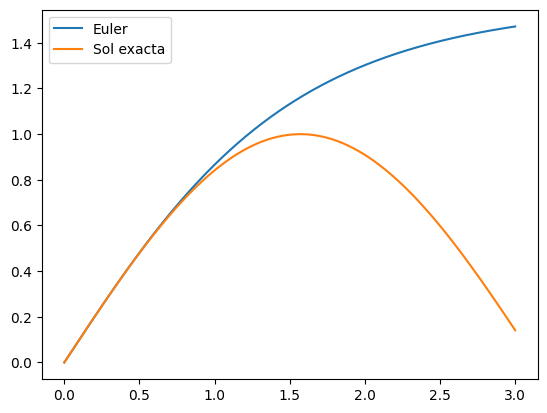

In [ ]:
def f2(t,x):
  y=np.cos(x)
  return y

x0=0
(t,x) = euler(f2,0,3,x0,1000) #La grilla para el eje x es t y la obtengo desde la funcion del metodo de euler!
plt.plot(t,x,label="Euler")
plt.plot(t,np.sin(t),label="Sol exacta") #solucion exacta para f1
plt.legend()
plt.show()

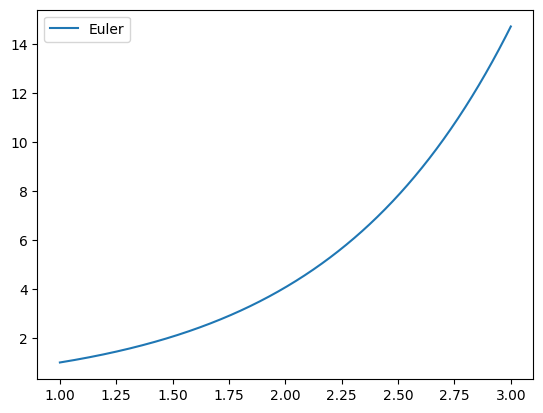

In [ ]:
def f3(t,x):
  y=(t+2)*x/(t+1)
  return y

x0=1
(t,x) = euler(f3,1,3,x0,1000) #La grilla para el eje x es t y la obtengo desde la funcion del metodo de euler!
plt.plot(t,x,label="Euler")
plt.legend()
plt.show()

**Ejemplo:** Resolver la ecuación del primer ejemplo en el intervalo $[0,1]$ para $x(0) = 0, \dots, 10$ con 200 pasos y graficar las soluciones en el mismo gráfico.

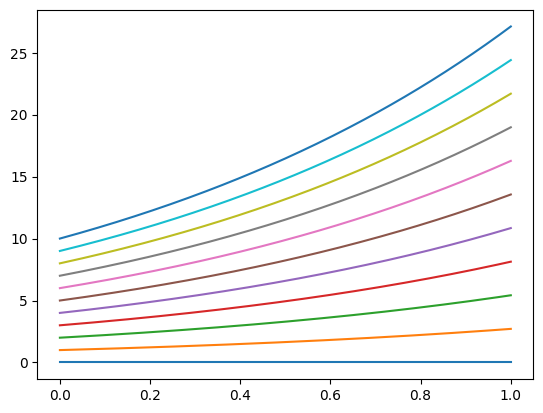

In [ ]:
for i in range(11):
    (t, x) = euler(f1, 0, 1, i, 200)
    plt.plot(t, x)

**Ejercicio 2:** Resolver la ecuación para $x(0) = 1$ en el intervalo [0,5] y pasos 5, 10, 100, 1000. Graficar las soluciones en el mismo gráfico.

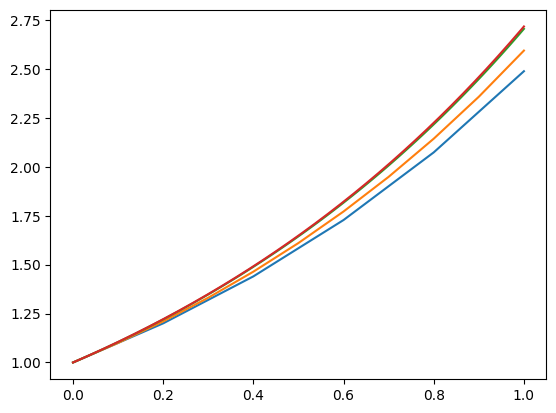

In [ ]:
ns=[5,10,100,1000]
for i in range(len(ns)):
    (t, x) = euler(f1, 0, 1, 1, ns[i])
    plt.plot(t, x)

## **Ejercicio 3:**

Consideremos el problema
$$x'(t) = 2x(t) - 5 \sin(t), \quad x(0) = 1$$

que tiene solución exacta $x(t) = 2 \sin(t) + \cos(t)$.

Graficar la solución exacta en el intervalo $[0,2]$ junto con las aproximaciones que se obtienen utilizando el método de Euler para $h = 0.1$, $h = 0.01$ y $h = 0.001$.

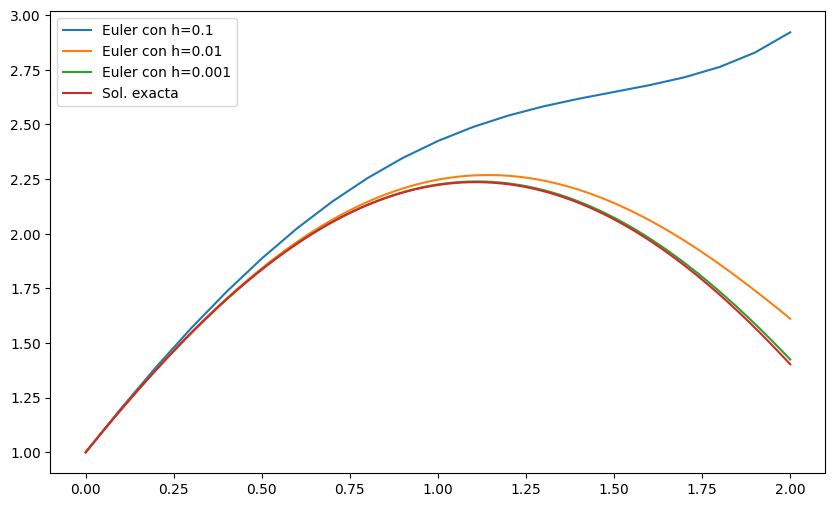

In [ ]:
def f(t,x): #Esta es la f de la ecuación para el método de Euler
    y = 2*x-5*np.sin(t)
    return y

def sol(t): #Acá definimos la solución exacta
    y= 2*np.sin(t)+np.cos(t)
    return y

#Recordemos que la función de Euler que definimos toma el parámetro n, y no h
#Asique tenemos que calcular h para cada caso
#Recordar usar int para calcular n

t0=0
T=2

n1=int((T-t0)/0.1)
n2=int((T-t0)/0.01)
n3=int((T-t0)/0.001)

(t1, x1) = euler(f, t0, T, 1, n1)
(t2, x2) = euler(f, t0, T, 1, n2)
(t3, x3) = euler(f, t0, T, 1, n3)
plt.figure(figsize=(10,6))
plt.plot(t1, x1,label="Euler con h=0.1")
plt.plot(t2, x2,label="Euler con h=0.01")
plt.plot(t3, x3,label="Euler con h=0.001")

t=np.linspace(t0,T,1000)
plt.plot(t, sol(t),label="Sol. exacta")
plt.legend()
plt.show()

## **Ejercicio 4:**

Graficar la diferencia entre las soluciones numéricas del  ítem anterior y la solución exacta (usar valor absoluto).

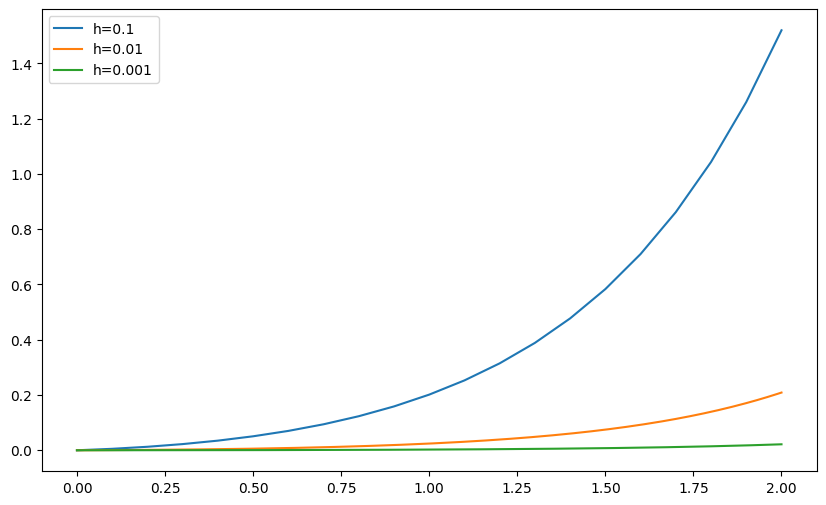

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t1, abs(x1-sol(t1)),label="h=0.1")
plt.plot(t2, abs(x2-sol(t2)),label="h=0.01")
plt.plot(t3, abs(x3-sol(t3)),label="h=0.001")
plt.legend()

## **Ejercicio 5:**
Graficar el error final, para $t = 2$, como función de $h $ (asegúrese de usar gráficos en escala logarítimica).

paso:  0.1 | x(n):  2.9219764782919064 | x(T):  1.402448017104221
paso:  0.01 | x(n):  1.6112841142166519 | x(T):  1.402448017104221
paso:  0.001 | x(n):  1.4240934700834782 | x(T):  1.402448017104221


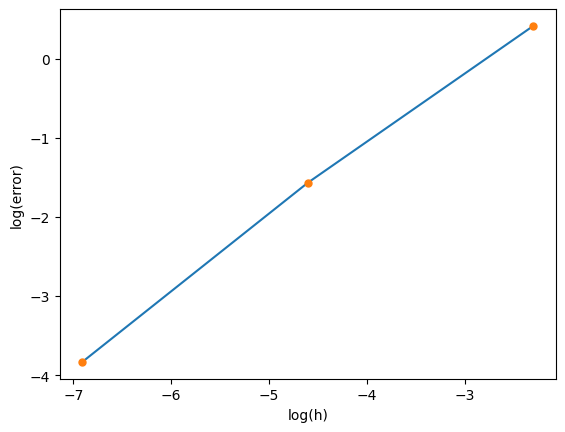

In [ ]:
h = [0.1, 0.01, 0.001] #Estos son los 3 h que vamos a usar
nh = len(h) #Le pedimos a python que nos diga la longitud de la lista h. Entonces nh=3 en este caso.
err = np.zeros(nh) #Un array con 3 posiciones, que vamos a rellenar luego con el valor del error para cada h
t0=0
T=2
for i in range(nh):
    n = n = int((T-t0)/h[i]) #Completar considerando que i va a estar recorriendo las posiciones de la lista h, es decir, i=0,1,2 en este caso
    (t, x) = euler(f, t0, T, 1, n) #Acá obtivmos una grilla t con sus respectivos valores x, cada una de largo n
    err[i] = abs(x[n]-sol(T)) #Completar #Queremos calcular cuanto es la diferencia de la solucion exacta en T=2 con el valor obtenido numericamente
    #Recordar que el valor obtenido numericamente para t=2 es el ultimo valor de la lista de los x.
    print("paso: ",h[i],"| x(n): ",x[n],"| x(T): ", sol(T))

plt.plot(np.log(h), np.log(err))  #Tambien se puede usar plt.loglog(h,err)
plt.plot(np.log(h), np.log(err), '.', ms=10)
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.show()

Para pensar: Calcular la pendiente del gráfico anterior. Debería dar cercana a 1. ¿Por qué?

Para pensar en casa: Hallar $h$ numéricamente, para que el error al estimar $x(10)$ con el método de Euler sea menor que $10^{−4}$